In [1]:
# Importation des donnees : 
import pandas as pd
# import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Stocker le model: 
import pickle

In [4]:
# Read data from the database :
df= pd.read_csv("../train.csv")

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
# Clean of database :
df_clean = df.copy()

In [8]:
df_clean.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.shape

(614, 13)

In [10]:
# Verification of Null Values :
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


To delete numerique values we replace it with median or variation 
To delete object values we replace it with mode

In [12]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
object_variables = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area', 'Loan_Status']
numerique_variables = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [14]:
print('numerique variables : ', numerique_variables)
print('object variables :', object_variables)

df = df.dropna(how='any', axis='rows')

numerique variables :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
object variables : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
# inplace used to change the data in the database :
# categorique data types :
df_clean['Gender'].fillna(df_clean['Gender'].mode()[0], inplace=True)
df_clean['Married'].fillna(df_clean['Married'].mode()[0], inplace=True)
df_clean['Dependents'].fillna(df_clean['Dependents'].mode()[0], inplace=True)
df_clean['Self_Employed'].fillna(df_clean['Self_Employed'].mode()[0], inplace=True)

In [17]:
# numerique data types :
df_clean['Loan_Amount_Term'].fillna(df_clean['Loan_Amount_Term'].median(), inplace=True)
df_clean['LoanAmount'].fillna(df_clean['LoanAmount'].median(), inplace=True)
df_clean['Credit_History'].fillna(df_clean['Credit_History'].median(), inplace=True)

In [18]:
# Cleaning Test : 
df_clean.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
# Target Variable: 

df_clean['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [20]:
df_clean['Loan_Status'].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

<AxesSubplot: title={'center': 'Credit Granted or not'}>

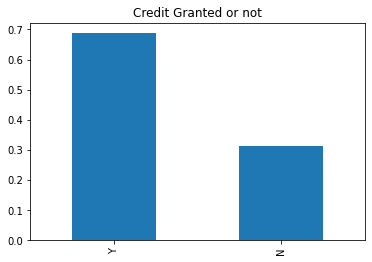

In [ ]:
df_clean['Loan_Status'].value_counts(normalize=True).plot.bar(title='Credit Granted or not')

In [21]:
# Count : le nombre des variables dans le dataset:
# mean : la moyenne
# 50%: la mediane() 
df_clean[numerique_variables].describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


THE CREATION OF THE PREVISION MODEL :

In [22]:
df_object = df_clean[object_variables]
df_num = df_clean[numerique_variables]
df_object

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [23]:
# df_object=pd.get_dummies(df_object, drop_first=True)
df_object

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [24]:
df_encoded = pd.concat([df_object, df_num], axis=1)
df_encoded

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0,Graduate,No,Urban,Y,5849,0.0,128.0,360.0,1.0
1,Male,Yes,1,Graduate,No,Rural,N,4583,1508.0,128.0,360.0,1.0
2,Male,Yes,0,Graduate,Yes,Urban,Y,3000,0.0,66.0,360.0,1.0
3,Male,Yes,0,Not Graduate,No,Urban,Y,2583,2358.0,120.0,360.0,1.0
4,Male,No,0,Graduate,No,Urban,Y,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y,2900,0.0,71.0,360.0,1.0
610,Male,Yes,3+,Graduate,No,Rural,Y,4106,0.0,40.0,180.0,1.0
611,Male,Yes,1,Graduate,No,Urban,Y,8072,240.0,253.0,360.0,1.0
612,Male,Yes,2,Graduate,No,Urban,Y,7583,0.0,187.0,360.0,1.0


In [25]:
df_encoded["Loan_Status"] = df_encoded["Loan_Status"].map({'Y': 1, 'N': 0})
Y = df_encoded['Loan_Status']
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [26]:
df_encoded["Gender"] = df_encoded["Gender"].map({'Male': 1, 'Female': 0})
df_encoded["Education"] = df_encoded["Education"].map({'Graduate': 1, 'Not Graduate': 0})
df_encoded["Property_Area"] = df_encoded["Property_Area"].map({'Urban': 0, 'Rural': 1, 'Semiurban': 2})
df_encoded["Self_Employed"] = df_encoded["Self_Employed"].map({'Yes': 1, 'No': 0})
df_encoded["Married"] = df_encoded["Married"].map({'Yes': 1, 'No': 0})
df_encoded["Dependents"] = df_encoded["Dependents"].apply(lambda x: 3 if x == '3+' else x)

In [27]:


# features :
X = df_encoded.drop('Loan_Status', axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,1,0,0,5849,0.0,128.0,360.0,1.0
1,1,1,1,1,0,1,4583,1508.0,128.0,360.0,1.0
2,1,1,0,1,1,0,3000,0.0,66.0,360.0,1.0
3,1,1,0,0,0,0,2583,2358.0,120.0,360.0,1.0
4,1,0,0,1,0,0,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,1,2900,0.0,71.0,360.0,1.0
610,1,1,3,1,0,1,4106,0.0,40.0,180.0,1.0
611,1,1,1,1,0,0,8072,240.0,253.0,360.0,1.0
612,1,1,2,1,0,0,7583,0.0,187.0,360.0,1.0


In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   Property_Area      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
dtypes: float64(4), int64(6), object(1)
memory usage: 52.9+ KB


In [29]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=6)

In [30]:
# Initiate the model :

regression_model = LogisticRegression()

# Train the model :

regression_model.fit(x_train,y_train)

# Tester le model : 

prediction = regression_model.predict(x_test)

prediction

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [31]:
# Tester la performance du Model : 

accuracy_score(y_test, prediction)

0.8292682926829268

In [33]:
# Tester une prevision : 

test_prevision_backend = [[1,1,1,0,0,0,1,0,1,0,100]]
regression_model.predict(test_prevision_backend)

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [81]:
pickle.dump(regression_model, open('model.pkl', 'wb'))